### Программный интерфейс Московской Биржи
- [Программный интерфейс к Информационно-статистическому серверу Московской Брижи (ИИС)](https://www.moex.com/a2193)
- [Руководство разработчика (v.1.4) (pdf)](https://fs.moex.com/files/6523)
- [Описание метаданных](https://iss.moex.com/iss/index)
- [Описание методов](https://iss.moex.com/iss/reference/)
- [Примеры для разработчиков (zip)](https://fs.moex.com/files/6524)
### Сервис открытых позиций по фьючерсам Московской Биржи
- [Описание сервиса](https://www.moex.com/ru/analyticalproducts?futoi)
- [Описание данных](https://fs.moex.com/f/12699/get-and-description-data.pdf)
- [Получение данных](https://fs.moex.com/f/12741/get-futoi-data.pdf) (код на Python)
- [Онлайн просмотр](https://www.moex.com/ru/derivatives/open-positions-online.aspx)
# Открытые позиции
При торговле акциями и облигациями весь объем выпущенных бумаг всегда находится на руках. Путем купли/продажи (длинные позиции) и короткой продажи/выкупа (короткие позиции) происходит обмен акций/облигаций на деньги.

Для фьючерсов нет физических бумаг, поэтому кол-во не ограничено. Открытый интерес показывает, сколько на текущий момент на рынке открытых позиций.

Как формируется открытый интерес: (из книги Джон Дж. Мэрфи [Технический анализ фьючерсных рынков: Теория и практика](https://www.litres.ru/book/dzhon-merfi/tehnicheskiy-analiz-fuchersnyh-rynkov-teoriya-i-praktika-4243165/))

- Покупатель: Открывает новую длинную позицию + Продавец: Открывает новую короткую позицию = Открытый интерес +2
- Покупатель: Открывает новую длинную позицию + Продавец: Закрывает старую длинную позицию = Открытый интерес 0
- Покупатель: Закрывает старую короткую позицию + Продавец: Открывает новую короткую позицию = Открытый интерес 0
- Покупатель: Закрывает старую короткую позицию + Продавец: Закрывает старую длинную позицию = Открытый интерес -2

Открытый интерес не меняется, когда длинная позиция переходит от продавца (он продает) к покупателю (он покупает) или короткая позиция переходит от покупателя (он выкупает) к продавцу (он коротит)

Московская Биржа выдает больше данных.
- Кол-во контрактов длинных и коротких позиций у физических и юридических лиц
- Кол-во физических и юридических лиц, держащих эти контракты
- Открытый интерес физических и юридических лиц как сумма длинных и коротких позиций
- Направленная позиция физических и юридических лиц как разность длинных и коротких позиций

Список фьючерсов и временнЫх интервалов, а также диапазон запроса:

In [1]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Родительская папка
from MOEXPy import MOEXPy # Программный интерфейс Московской Биржи
from Config import Config  # Файл конфигурации

from datetime import datetime, timedelta
from time import time
start_time = time()  # Время начала запуска скрипта

security = 'Si'  # Si курс доллар США-российский рубль
# security = "BR"  # BR нефть BRENT
# security = "RI"  # RI Индекс РТС
# security = "Eu"  # Eu курс евро-российский рубль
# security = "ED"  # ED курс евро-доллар США
# security = "GD"  # GD аффинированное золото в слитках
# security = "SV"  # SV аффинированное серебро в слитках
# security = "CL"  # CL нефть Light Sweet Crude Oil
# security = "MX"  # MX Индекс МосБиржи
# security = "MM"  # MM Индекс МосБиржи (мини)
# security = "SR"  # SR обыкновенные акции ПАО Сбербанк
# security = "GZ"  # GZ обыкновенные акции ПАО "Газпром"
# security = "LK"  # LK обыкновенные акции ПАО "НК "ЛУКОЙЛ"
# security = "VB"  # VB обыкновенные акции Банк ВТБ (ПАО)
# security = "PT"  # PT аффинированную платину в слитках
# security = "PD"  # PD аффинированный палладий в слитках
# security = "O2"  # O2 "двухлетние" облигации федерального займа
# security = "O4"  # O4 "четырехлетние" облигации федерального займа
# security = "O6"  # O6 "шестилетние" облигации федерального займа
# security = "OX"  # OX "десятилетние" облигации федерального займа
# security = "OV"  # OV "пятнадцатилетние" облигации федерального займа
# security = "AU"  # AU курс австралийский доллар-доллар США
# security = "SF"  # SF SPDR S&amp; P 500 ETF Trust
# security = "RN"  # RN обыкновенные акции ПАО "НК "Роснефть"
# security = "MN"  # MN обыкновенные акции ПАО "Магнит"
# security = "AF"  # AF обыкновенные акции ПАО "Аэрофлот"
# security = "AL"  # AL обыкновенные акции АК "АЛРОСА"
# security = "SN"  # SN обыкновенные акции ПАО "Сургутнефтегаз"
# security = "YN"  # YN обыкновенные акции "Яндекс Н.В."
# security = "TT"  # TT обыкновенные акции ПАО "Татнефть"
# security = "SP"  # SP привилегированные акции ПАО Сбербанк
# security = "NM"  # NM обыкновенные акции ПАО "НЛМК"
# security = "HY"  # HY обыкновенные акции ПАО "РусГидро"
# security = "ME"  # ME обыкновенные акции ПАО Московская Биржа
# security = "FV"  # FV гдр X5 Ритейл Груп
# security = "GK"  # GK обыкновенные акции ГМК "Норильский никель"
# security = "MG"  # MG ПАО "Магнитогорский металлургический комбинат"
# security = "ML"  # ML гдр Мэйл.ру Груп
# security = "VI"  # VI волатильность российского рынка
# security = "NG"  # NG природный газ
# security = "CR"  # CR курс юань - российский рубль
# security = "CNYRUBF"  # CNYRUBF юань вечный фьючерс

today = datetime.today()  # Сегодняшняя (to_date) дата и время
week_ago1 = (today - timedelta(days=7)).date()  # Дата одной недели назад
week_ago2 = (today - timedelta(days=14)).date()  # Дата двух недель назад
today = today.date()  # Сегодняшняя дата
print(week_ago1, '-', today)

latest = 0  # Получение данных раз в 5 минут
# latest = 1  # Получение данных раз в день

moexpy = MOEXPy(Config.Login, Config.Password)  # Авторизуемся на Московской Бирже
# df = moexpy.futoi_to_dataframe(security, latest=latest)  # Последние 1000 значений (по 500 для физических и юридических лиц)
df = moexpy.futoi_to_dataframe(security, from_date=week_ago1, latest=latest)  # Последняя неделя
# df = moexpy.futoi_to_dataframe(security, from_date=week_ago2, to_date=week_ago1, latest=latest)  # Предпоследняя неделя
# Если указать только параметр to_date, то он игнорируется. Получаем последние 1000 значений
print(df)

print(f'Скрипт выполнен за {(time() - start_time):.2f} с')

2023-09-03 - 2023-09-10
2023-09-06 1000
2023-09-04 1696
2023-08-31 2396
      sess_id  seqnum      trade_datetime ticker clgroup     pos  pos_long  \
0        6876      59 2023-09-04 09:05:00     Si     FIZ -219330    457159   
1        6876      59 2023-09-04 09:05:00     Si     YUR  219330   2903862   
2        6876      60 2023-09-04 09:10:00     Si     FIZ -218965    457514   
3        6876      60 2023-09-04 09:10:00     Si     YUR  218965   2903771   
4        6876      61 2023-09-04 09:15:00     Si     FIZ -217904    461058   
...       ...     ...                 ...    ...     ...     ...       ...   
1741     6881      55 2023-09-08 23:40:00     Si     YUR  373069   2693029   
1742     6881      56 2023-09-08 23:45:00     Si     FIZ -373038    398708   
1743     6881      56 2023-09-08 23:45:00     Si     YUR  373038   2693045   
1744     6881      57 2023-09-08 23:50:00     Si     FIZ -372916    398209   
1745     6881      57 2023-09-08 23:50:00     Si     YUR  372916   269

Построим графики по аналогии с [Online Oткрытые позиции по фьючерсам](https://www.moex.com/ru/derivatives/open-positions-online.aspx)

In [2]:
from datetime import time
import matplotlib.pyplot as plt  # Двумерные графики (SciPy.org)

# Линейный масштаб по оси x. Индекс - номер значения
fiz = df[df['clgroup'] == 'FIZ'].reset_index(drop=True)  # Физические лица
yur = df[df['clgroup'] == 'YUR'].reset_index(drop=True)  # Юридические лица
dt_session = fiz['trade_datetime'][fiz['trade_datetime'].dt.time.isin([time(9, 5), time(10, 0), time(14, 10), time(19, 10)])]  # Времена начала сессий

# Масштаб дат/времени по оси x. Индекс - дата и время торгов на бирже
# fiz = df[df['clgroup'] == 'FIZ'].set_index('trade_datetime', drop=False)  # Физические лица
# yur = df[df['clgroup'] == 'YUR'].set_index('trade_datetime', drop=False)  # Юридические лица
# dt_session = fiz[fiz['trade_datetime'].dt.time.isin([time(9, 5), time(10, 0), time(14, 10), time(19, 10)])]['trade_datetime']  # Времена начала сессий

dt_session_labels = dt_session.dt.strftime('%H:%M')  # Отображать будем часы и минуты
last_trade_datetime = fiz.index[-1]  # Последняя дата и время на бирже
print(dt_session)

0     2023-09-04 09:05:00
11    2023-09-04 10:00:00
61    2023-09-04 14:10:00
118   2023-09-04 19:10:00
175   2023-09-05 09:05:00
186   2023-09-05 10:00:00
236   2023-09-05 14:10:00
293   2023-09-05 19:10:00
350   2023-09-06 09:05:00
361   2023-09-06 10:00:00
411   2023-09-06 14:10:00
468   2023-09-06 19:10:00
525   2023-09-07 09:05:00
536   2023-09-07 10:00:00
642   2023-09-07 19:10:00
699   2023-09-08 09:05:00
710   2023-09-08 10:00:00
760   2023-09-08 14:10:00
816   2023-09-08 19:10:00
Name: trade_datetime, dtype: datetime64[ns]


# Длинные/Короткие позиции

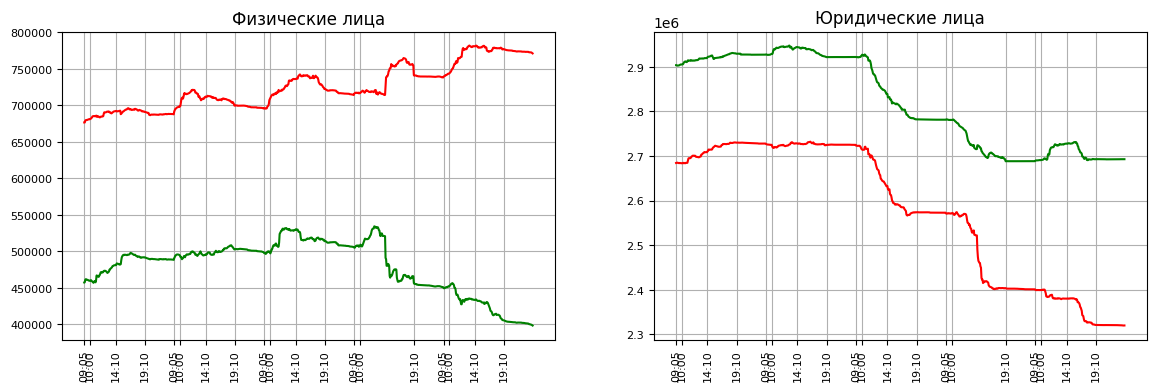

In [3]:
plt.figure(figsize=(14,4))  # Размер графика в дюймах

ax = plt.subplot(121, title = 'Физические лица')  # Левый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)
plt.grid()  # Сетка
plt.plot(fiz.index, fiz['pos_long'], 'g')  # Длинные позиции физических лиц
plt.plot(fiz.index, -fiz['pos_short'], 'r')  # Короткие позиции физических лиц

ax = plt.subplot(122, title = 'Юридические лица')  # Правый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)
plt.grid()  # Сетка
plt.plot(yur.index, yur['pos_long'], 'g')  # Длинные позиции юридических лиц
plt.plot(yur.index, -yur['pos_short'], 'r')  # Короткие позиции юридических лиц

plt.show()

- Идет противостояние физических и юридических лиц. Если физические лица, по большей части держат длинные позиции, то юридические - короткие. И наоборот.
- Вопреки расхожему мнению, на закрытии рынка (у времени 09:05) нет массовых закрытий позиций, чтобы не держать их через ночь.

# Количество лиц

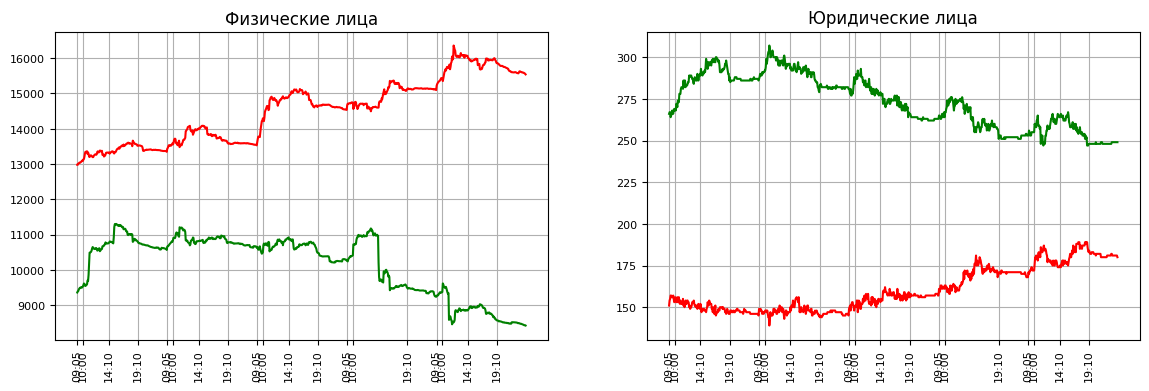

In [4]:
plt.figure(figsize=(14,4))  # Размер графика в дюймах

ax = plt.subplot(121, title = 'Физические лица')  # Левый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(fiz.index, fiz['pos_long_num'], 'g')  # Кол-во физических лиц с длинными позициями
plt.plot(fiz.index, fiz['pos_short_num'], 'r')  # Кол-во физических лиц с короткими позициями

ax = plt.subplot(122, title = 'Юридические лица')  # Правый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(yur.index, yur['pos_long_num'], 'g')  # Кол-во юридических лиц с длинными позициями
plt.plot(yur.index, yur['pos_short_num'], 'r')  # Кол-во юридических лиц с короткими позициями

plt.show()

# Открытый интерес
Сумма длинных и коротких позиций

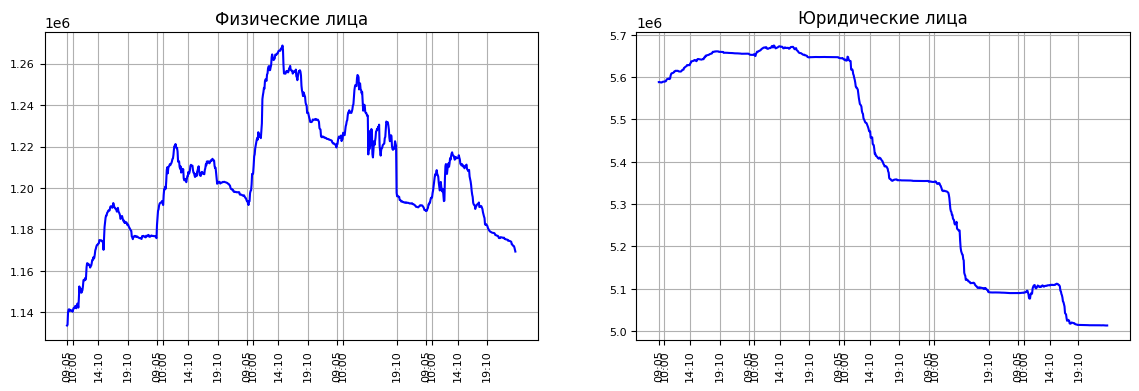

In [5]:
plt.figure(figsize=(14,4))  # Размер графика в дюймах

ax = plt.subplot(121, title = 'Физические лица')  # Левый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(fiz.index, fiz['pos_long'] - fiz['pos_short'], 'b')  # Открытый интерес физических лиц

ax = plt.subplot(122, title = 'Юридические лица')  # Правый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(yur.index, yur['pos_long'] - yur['pos_short'], 'b')  # Открытый интерес юридических лиц

plt.show()

# Направленная позиция
Разность длинных и коротких позиций

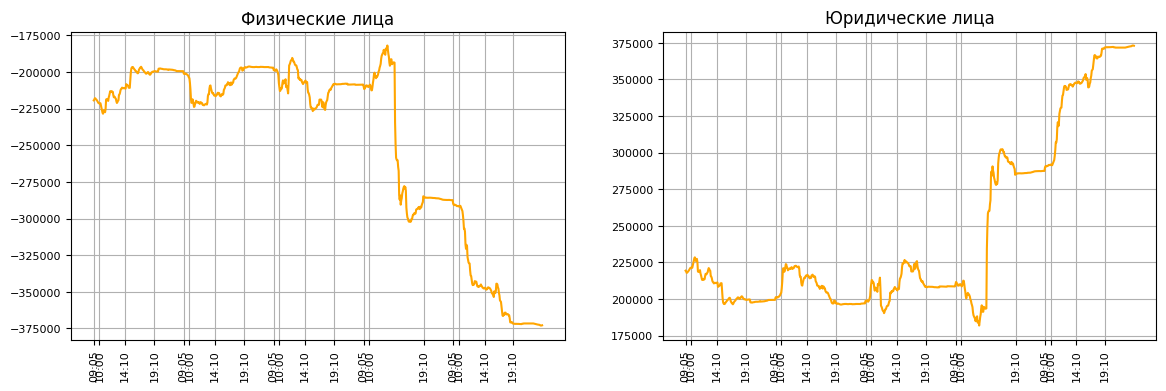

In [6]:
plt.figure(figsize=(14,4))  # Размер графика в дюймах

ax = plt.subplot(121, title = 'Физические лица')  # Левый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(fiz.index, fiz['pos_long'] + fiz['pos_short'], 'orange')  # Направленная позиция физических лиц

ax = plt.subplot(122, title = 'Юридические лица')  # Правый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)  # Рисуем сетку на выбранных отметках. Отметки в виде времени поворачиваем на 90 градусов против часовой стрелки
plt.grid()  # Сетка
plt.plot(yur.index, yur['pos_long'] + yur['pos_short'], 'orange')  # Направленная позиция юридических лиц

plt.show()

- Физические и юридические направленные позиции симметричны относительно нулевой линии
# Последний средний размер позиции
Нужно определить особенности физических и юридических лиц. Давайте посмотрим, сколько физическое и юридическое лицо, в среднем, держит в длинной и короткой позиции.

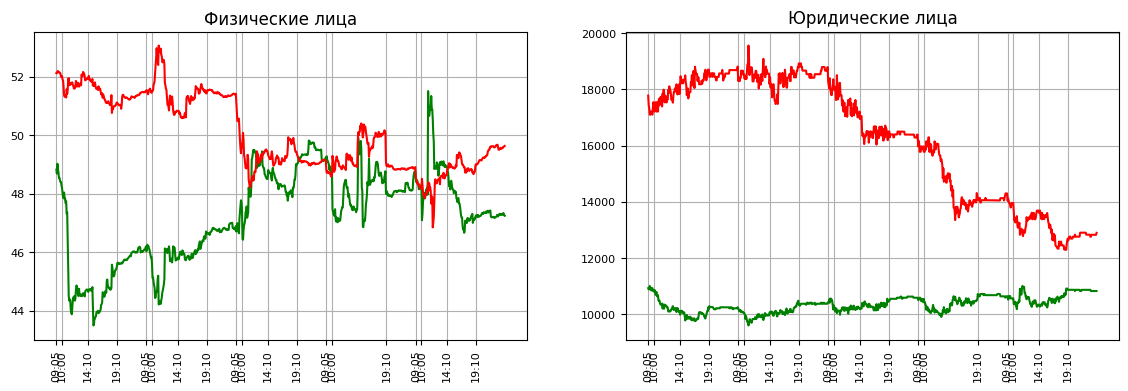

Физическое лицо, длинная позиция: 47
Физическое лицо, короткая позиция: 49
Юридическое лицо, длинная позиция: 10815 (больше в 228 раз)
Юридическое лицо, короткая позиция: 12889 (больше в 259 раз)


In [7]:
plt.figure(figsize=(14,4))  # Размер графика в дюймах

ax = plt.subplot(121, title = 'Физические лица')  # Левый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)
plt.grid()  # Сетка
fiz_pos_long_size = fiz['pos_long'] / fiz['pos_long_num']  # Средний размер длинной позиции физического лица
plt.plot(fiz.index, fiz_pos_long_size, 'g')
fiz_pos_short_size = -fiz['pos_short'] / fiz['pos_short_num']  # Средний размер короткой позиции физического лица
plt.plot(fiz.index, fiz_pos_short_size, 'r')

ax = plt.subplot(122, title = 'Юридические лица')  # Правый график
ax.tick_params(axis='both', which='major', labelsize=8)  # Размер шрифта значений
plt.xticks(ticks=dt_session.index, labels=dt_session_labels, rotation=90)
plt.grid()  # Сетка
yur_pos_long_size = yur['pos_long'] / yur['pos_long_num']  # Средний размер длинной позиции юридического лица
plt.plot(yur.index, yur_pos_long_size, 'g')
yur_pos_short_size = -yur['pos_short'] / yur['pos_short_num']  # Средний размер короткой позиции юридического лица
plt.plot(yur.index, yur_pos_short_size, 'r')

plt.show()

print('Физическое лицо, длинная позиция:', int(fiz_pos_long_size[last_trade_datetime]))
print('Физическое лицо, короткая позиция:', int(fiz_pos_short_size[last_trade_datetime]))
print('Юридическое лицо, длинная позиция:', int(yur_pos_long_size[last_trade_datetime]), '(больше в', int(yur_pos_long_size[last_trade_datetime] / fiz_pos_long_size[last_trade_datetime]), 'раз)')
print('Юридическое лицо, короткая позиция:', int(yur_pos_short_size[last_trade_datetime]), '(больше в', int(yur_pos_short_size[last_trade_datetime] / fiz_pos_short_size[last_trade_datetime]), 'раз)')

- Юридическое лицо держит на 2 порядка (в сотни раз) больше позицию, чем физическое лицо
- Депозиты у физических лиц меньше, чем у юридических
- Можно посчитать средний размер депозита физического лица. Если держать 50 контрактов с ГО 15 000 руб. на контракт, то минимальный депозит 750 000 руб. Еще нужно накинуть, чтобы пересиживать просадки. Получается, что средний депозит около 1 000 000 руб.
# Последнее кол-во физических и юридических лиц
Если юридические лица берут размером позиции, то физические лица берут числом.

In [8]:
print('Физическое лицо, длинная позиция:', int(fiz['pos_long_num'][last_trade_datetime]), '(больше в', int(fiz['pos_long_num'][last_trade_datetime] / yur['pos_long_num'][last_trade_datetime]), 'раз)')
print('Физическое лицо, короткая позиция:', int(fiz['pos_short_num'][last_trade_datetime]), '(больше в', int(fiz['pos_short_num'][last_trade_datetime] / yur['pos_short_num'][last_trade_datetime]), 'раз)')
print('Юридическое лицо, длинная позиция:', int(yur['pos_long_num'][last_trade_datetime]))
print('Юридическое лицо, короткая позиция:', int(yur['pos_short_num'][last_trade_datetime]))

Физическое лицо, длинная позиция: 8429 (больше в 33 раз)
Физическое лицо, короткая позиция: 15537 (больше в 86 раз)
Юридическое лицо, длинная позиция: 249
Юридическое лицо, короткая позиция: 180


- Кол-во физических лиц на 1-2 порядка больше, чем юридических
- В текущих сделках больше участвует физических лиц, чем юридических

Что сейчас происходит на рынке? Смотрим изменение кол-ва позиций за последнее движение.

In [9]:
period = 3  # Движение за сколько 5-и минутных бар смотрим

fiz_long_pos_hp1 = fiz['pos_long'][last_trade_datetime] - fiz['pos_long'][last_trade_datetime - period]
print('Физическое лицо, длинная позиция:', fiz_long_pos_hp1, '(покупка)' if fiz_long_pos_hp1 > 0 else '(продажа)')
fiz_short_pos_hp1 = -fiz['pos_short'][last_trade_datetime] + fiz['pos_short'][last_trade_datetime - period]
print('Физическое лицо, короткая позиция:', fiz_short_pos_hp1, '(короткая продажа)' if fiz_short_pos_hp1 > 0 else '(выкуп)')
yur_long_pos_hp1 = yur['pos_long'][last_trade_datetime] - yur['pos_long'][last_trade_datetime - period]
print('Юридическое лицо, длинная позиция:', yur_long_pos_hp1, '(покупка)' if yur_long_pos_hp1 > 0 else '(продажа)')
yur_short_pos_hp1 = -yur['pos_short'][last_trade_datetime] + yur['pos_short'][last_trade_datetime - period]
print('Юридическое лицо, короткая позиция:', yur_short_pos_hp1, '(короткая продажа)' if yur_short_pos_hp1 > 0 else '(выкуп)')

Физическое лицо, длинная позиция: -1261 (продажа)
Физическое лицо, короткая позиция: -1406 (выкуп)
Юридическое лицо, длинная позиция: -14 (продажа)
Юридическое лицо, короткая позиция: 131 (короткая продажа)


- Изменение позиций у физических и юридических лиц сопоставимо
- Физические лица влияют на изменение цены в краткосрочной перспективе, а юридические в долгосрочной